In [29]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import math

class Number:
    def __init__(self, radians):
        self.radians = radians
    
    @staticmethod
    def from_degrees(degrees):
        return Number(degrees * math.pi / 180)

    @staticmethod
    def from_radians(radians):
        return Number(radians)
    
    def as_radians(self):
        return self.radians

    def as_degrees(self):
        return self.radians * 180 / math.pi

    def cos(self):
        return math.cos(self.radians)

    def sin(self):
        return math.sin(self.radians)

    def tan(self):
        return math.tan(self.radians)

    def acos(self):
        return math.acos(self.radians)

    def asin(self):
        return math.asin(self.radians)

    def atan(self):
        return math.atan(self.radians)


print(Number.from_degrees(15).as_radians())
print(Number.from_degrees(15).atan())
print(Number.from_radians(0.3).asin())

0.2617993877991494
0.25605276998075555
0.3046926540153975


In [31]:
tree = ["a", [["b", ["d", "e"]], ["c", ["f"]]]]
print(f"Root: {tree[0]}, Left Child: {tree[1][0]}, Right Child: {tree[1][1]}")

Root: a, Left Child: ['b', ['d', 'e']], Right Child: ['c', ['f']]


In [32]:
import random

class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
                return
            self.left.insert(data)
        if data > self.data:
            if self.right is None:
                self.right = Tree(data)
                return
            self.right.insert(data)
        if data == self.data:
            raise "Duplicate element"

    def inorder_traversal(self, node, f):
        if node is not None:
            self.inorder_traversal(node.left, f)
            f(node.data)
            self.inorder_traversal(node.right, f)
    
    def print_tree(self):
        print("Tree:")
        self.inorder_traversal(self, print)
    

l = [0,1,2,3,4,6,7,8,9]
random.shuffle(l)
print(l)
tree = Tree(5)
for i in l:
    tree.insert(i)
tree.print_tree()

[4, 0, 8, 7, 2, 1, 3, 6, 9]
Tree:
0
1
2
3
4
5
6
7
8
9


[Text(0.5, 0.75, 'x[0] <= 0.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

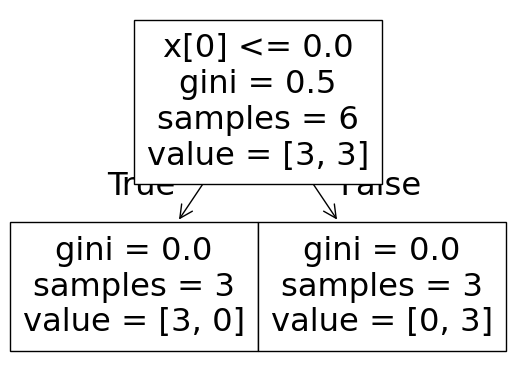

In [33]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]
classifier = DecisionTreeClassifier()
classifier.fit(x, target)

tree.plot_tree(classifier)

MSE: 0.6425
MAE: 0.5025
Prediction: [ 9.9     0.4     0.53    6.7     0.097   6.     19.      0.9986  3.27
  0.82   11.7   ] -> 7.0
              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00        10
           5       0.68      0.64      0.66       170
           6       0.56      0.59      0.57       164
           7       0.38      0.42      0.40        48
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.44      0.33      0.35       400
weighted avg       0.57      0.56      0.57       400



[Text(0.5424830758962624, 0.9705882352941176, 'x[10] <= 10.525\nsquared_error = 0.656\nsamples = 1199\nvalue = 5.632'),
 Text(0.3285302250190694, 0.9117647058823529, 'x[1] <= 0.548\nsquared_error = 0.422\nsamples = 741\nvalue = 5.359'),
 Text(0.4355066504576659, 0.9411764705882353, 'True  '),
 Text(0.21308876811594202, 0.8529411764705882, 'x[6] <= 65.5\nsquared_error = 0.421\nsamples = 347\nvalue = 5.548'),
 Text(0.13613176964149504, 0.7941176470588235, 'x[9] <= 0.645\nsquared_error = 0.436\nsamples = 258\nvalue = 5.651'),
 Text(0.053108314263920674, 0.7352941176470589, 'x[9] <= 0.505\nsquared_error = 0.33\nsamples = 149\nvalue = 5.477'),
 Text(0.018306636155606407, 0.6764705882352942, 'x[8] <= 3.375\nsquared_error = 0.222\nsamples = 24\nvalue = 5.167'),
 Text(0.015255530129672006, 0.6176470588235294, 'x[6] <= 11.5\nsquared_error = 0.17\nsamples = 23\nvalue = 5.217'),
 Text(0.012204424103737605, 0.5588235294117647, 'squared_error = 0.0\nsamples = 1\nvalue = 6.0'),
 Text(0.0183066361556

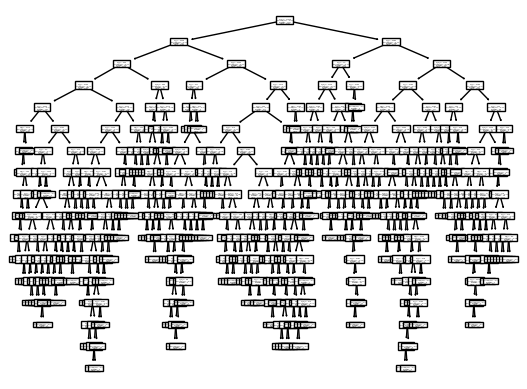

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.25)
classifier = DecisionTreeRegressor()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Prediction: {x_test[0]} -> {y_pred[0]}")
print(classification_report(y_test, y_pred))
df.head(5)
tree.plot_tree(classifier)